#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### loading data

In [2]:
df = pd.read_csv("Iris.csv")

#### data cleaning


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
flowers = {
    0 : "Iris-setosa",
    1 : "Iris-versicolor",
    2 : "Iris-virginica"
}

In [9]:
le = LabelEncoder()
df_dup = df
df_dup.Species = le.fit_transform(df_dup.Species)
df_dup.drop('Id',inplace = True,axis = 1)
df_dup

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### data visualization

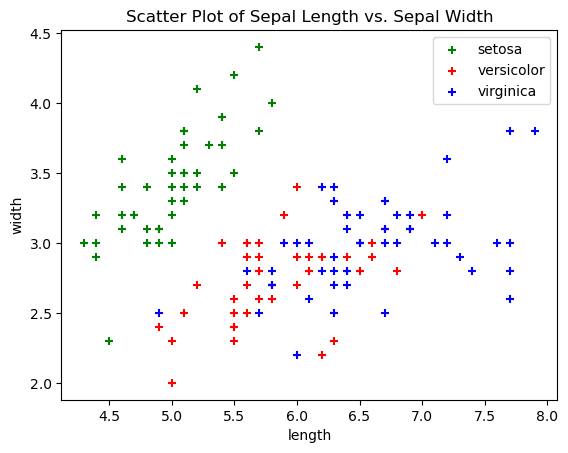

In [10]:
df1 = df[df['Species'] == 0]
df2 = df[df['Species'] == 1]
df3 = df[df['Species'] == 2]

plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], marker="+", color="green",label = "setosa")
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], marker="+", color="red",label = "versicolor")
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], marker="+", color="blue",label = "virginica")
plt.xlabel('length')
plt.ylabel("width")
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.legend()
plt.show()

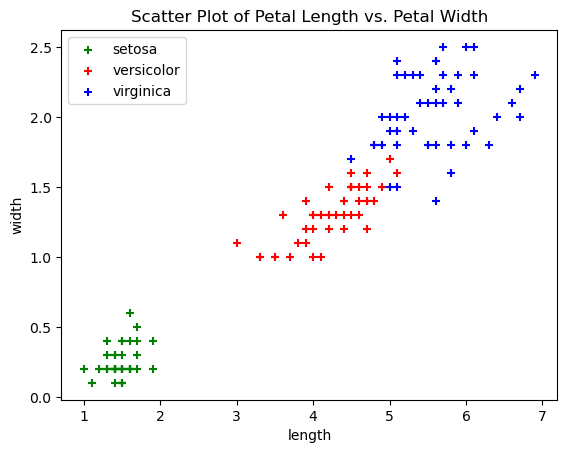

In [11]:
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], marker="+", color="green",label = "setosa")
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], marker="+", color="red",label = "versicolor")
plt.scatter(df3['PetalLengthCm'], df3['PetalWidthCm'], marker="+", color="blue",label = "virginica")
plt.xlabel('length')
plt.ylabel("width")
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.legend()
plt.show()

#### train & test split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df_dup[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],df_dup.Species,test_size = 0.3)

In [13]:
len(x_train)

105

In [14]:
len(x_test)

45

In [15]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
52,6.9,3.1,4.9,1.5
129,7.2,3.0,5.8,1.6
14,5.8,4.0,1.2,0.2
144,6.7,3.3,5.7,2.5
111,6.4,2.7,5.3,1.9
135,7.7,3.0,6.1,2.3
108,6.7,2.5,5.8,1.8
9,4.9,3.1,1.5,0.1
1,4.9,3.0,1.4,0.2
113,5.7,2.5,5.0,2.0


#### machine learning model

In [16]:
reg = LogisticRegression(solver = 'lbfgs',max_iter = 1000)
reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
reg.score(x_test,y_test)

0.9777777777777777

In [18]:
y_predicted = reg.predict(x_test)
y_predicted

array([1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1,
       1], dtype=int64)

In [19]:
y_test

52     1
129    2
14     0
144    2
111    2
135    2
108    2
9      0
1      0
113    2
36     0
58     1
137    2
65     1
107    2
125    2
69     1
19     0
97     1
61     1
131    2
78     1
5      0
18     0
88     1
31     0
73     1
115    2
63     1
109    2
13     0
49     0
21     0
85     1
25     0
114    2
15     0
103    2
105    2
149    2
95     1
45     0
98     1
119    2
54     1
Name: Species, dtype: int64

In [20]:
cross_val_score(reg,df_dup,df_dup.Species)

array([1., 1., 1., 1., 1.])

#### confusion matrix

Text(33.22222222222222, 0.5, 'Truth')

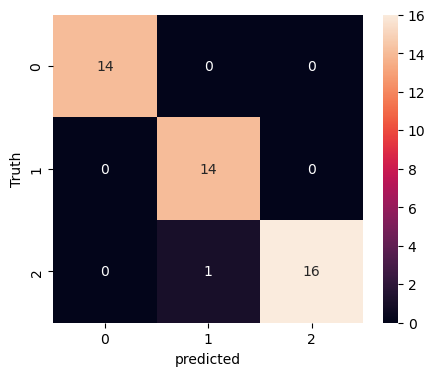

In [21]:
cm = confusion_matrix(y_test,y_predicted)
cm
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')